# Data

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization
import matplotlib.pyplot as plt # data visualization

# Acquire

In [2]:
# Reading the dataset
path = "StudentsPerformance.csv"
df = pd.read_csv(path)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
# Number of observations and variables
print(f"There are {df.shape[0]} observations and {df.shape[1]} variables in the dataset.")

There are 1000 observations and 8 variables in the dataset.


In [4]:
# Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
# There are no duplicate values
df.duplicated().sum()

0

In [6]:
# There are no missing values
df.isna().any()

gender                         False
race/ethnicity                 False
parental level of education    False
lunch                          False
test preparation course        False
math score                     False
reading score                  False
writing score                  False
dtype: bool

* **CATEGORICAL VARIABLES** (object)
    * **gender** : female/male
    * **race/ethnicity** : group A/B/C/D/E
    * **parental level of education**
    * **lunch** : standard - free/reduced
    * **test preparation course** : none / completed
* **NUMERICAL VARIABLES** (int)
    * **math score** 
    * **reading score** 
    * **writing score** 

# Prepare

In [7]:
# Upper column names and separate them with "_"
df.columns = [column.upper().replace(" ", "_") for column in df.columns]
df.head()

,GENDER,RACE/ETHNICITY,PARENTAL_LEVEL_OF_EDUCATION,LUNCH,TEST_PREPARATION_COURSE,MATH_SCORE,READING_SCORE,WRITING_SCORE
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [8]:
# Object to category
for column in df.loc[:, "GENDER":"TEST_PREPARATION_COURSE"].columns:
    df[column] = df[column].astype("category")
    
# Parental level of education: ordered -> True
df.PARENTAL_LEVEL_OF_EDUCATION = pd.Categorical(df.PARENTAL_LEVEL_OF_EDUCATION, categories=['high school', 'some high school', "some college", "associate's degree", "bachelor's degree", "master's degree"], 
                                                    ordered=True)

# Checking with assert
assert df.PARENTAL_LEVEL_OF_EDUCATION.dtype == "category"

In [9]:
# Creating the "TOTAL_SCORE" column
df["TOTAL_SCORE"] = round((df.MATH_SCORE + df.READING_SCORE + df.WRITING_SCORE) / 3, 2)
df.head()

,GENDER,RACE/ETHNICITY,PARENTAL_LEVEL_OF_EDUCATION,LUNCH,TEST_PREPARATION_COURSE,MATH_SCORE,READING_SCORE,WRITING_SCORE,TOTAL_SCORE
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67
1,female,group C,some college,standard,completed,69,90,88,82.33
2,female,group B,master's degree,standard,none,90,95,93,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33
4,male,group C,some college,standard,none,76,78,75,76.33


In [10]:
# Creating a bell curve
def to_letter_grade(score):
    if score > 92:
        return "AA"
    elif score > 84:
        return "BA"
    elif score > 76:
        return "BB"
    elif score > 68:
        return "CB"
    elif score > 60:
        return "CC"
    elif score > 52:
        return "DD"
    elif score > 44:
        return "FD"
    else:
        return "FF"
df["LETTER_GRADE"] = [to_letter_grade(round(score)) for score in df["TOTAL_SCORE"]]

In [11]:
# Getting data into title format
for column in df.loc[:, "GENDER":"TEST_PREPARATION_COURSE"].columns:
    df[column] = [cat.title() for cat in df[column]]
df.head()

,GENDER,RACE/ETHNICITY,PARENTAL_LEVEL_OF_EDUCATION,LUNCH,TEST_PREPARATION_COURSE,MATH_SCORE,READING_SCORE,WRITING_SCORE,TOTAL_SCORE,LETTER_GRADE
0,Female,Group B,Bachelor'S Degree,Standard,None,72,72,74,72.67,CB
1,Female,Group C,Some College,Standard,Completed,69,90,88,82.33,BB
2,Female,Group B,Master'S Degree,Standard,None,90,95,93,92.67,AA
3,Male,Group A,Associate'S Degree,Free/Reduced,None,47,57,44,49.33,FD
4,Male,Group C,Some College,Standard,None,76,78,75,76.33,CB


# Explore

In [12]:
# Summary statistics of numeric variables
df.describe()

,MATH_SCORE,READING_SCORE,WRITING_SCORE,TOTAL_SCORE
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,67.770580
std,15.16308,14.600192,15.195657,14.257311
min,0.00000,17.000000,10.000000,9.000000
25%,57.00000,59.000000,57.750000,58.330000
50%,66.00000,70.000000,69.000000,68.330000
75%,77.00000,79.000000,79.000000,77.670000
max,100.00000,100.000000,100.000000,100.000000


* Score average between 66-70 for all tests.
* The mean and median are close to each other.
* There is no student who gets 0 except math.

In [13]:
# Summaries of categorical variables
df.describe(include = "object")

,GENDER,RACE/ETHNICITY,PARENTAL_LEVEL_OF_EDUCATION,LUNCH,TEST_PREPARATION_COURSE,LETTER_GRADE
count,1000,1000,1000,1000,1000,1000
unique,2,5,6,2,2,8
top,Female,Group C,Some College,Standard,None,CB
freq,518,319,226,645,642,217


* The number of **female** students is higher than the number of **male** students.
* There are students in **group C** at most.
* The highest level of education for parents is **some college**.
* Students usually pay the **standard** rate for lunch.
* The number of students who attend the **test preparation course** is higher than the number of students who do not.

In [14]:
df.groupby("GENDER").mean()

,MATH_SCORE,READING_SCORE,WRITING_SCORE,TOTAL_SCORE
GENDER,,,,
Female,63.633205,72.608108,72.467181,69.569498
Male,68.728216,65.473029,63.311203,65.837303


* **Male** are better at **math** than **female**, while female do better at **reading**, **writing** and on **total**. 

In [15]:
df.pivot_table(values = "TOTAL_SCORE", 
               index = ["PARENTAL_LEVEL_OF_EDUCATION", "TEST_PREPARATION_COURSE"],
               aggfunc = [np.median, np. mean],
               margins = True)

median        mean
                                                    TOTAL_SCORE TOTAL_SCORE
PARENTAL_LEVEL_OF_EDUCATION TEST_PREPARATION_COURSE                        
Associate'S Degree          Completed                    76.335   74.938780
                            None                         66.500   66.423786
Bachelor'S Degree           Completed                    74.835   76.239783
                            None                         68.835   69.166667
High School                 Completed                    68.165   66.964821
                            None                         62.670   61.550143
Master'S Degree             Completed                    76.335   76.316500
                            None                         73.000   72.204872
Some College                Completed                    75.330   74.653636
                            None                         65.000   65.283691
Some High School            Completed                    71.330   69.337273
                            None                         63.665   61.914706
All                                                      68.330   67.770580

## Distributions of Scores

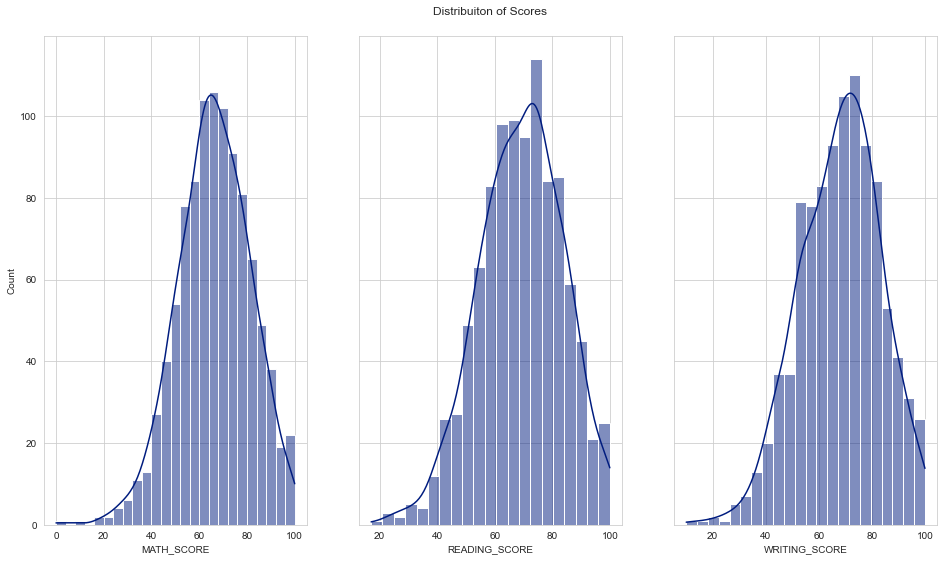

In [16]:
sns.set_palette("dark")
sns.set_style("whitegrid")
fig, ax = plt.subplots(nrows = 1, ncols = 3, sharey = True, figsize = (16,9))
ax[1].set_title("Distribuiton of Scores", y = 1.03)
sns.histplot(df["MATH_SCORE"], ax = ax[0], kde = True)
sns.histplot(df["READING_SCORE"], ax = ax[1], kde = True)
sns.histplot(df["WRITING_SCORE"], ax = ax[2], kde = True)
plt.show()

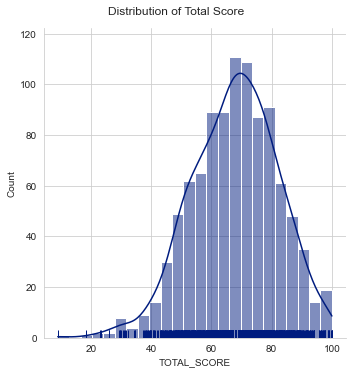

In [17]:
g = sns.displot(df["TOTAL_SCORE"], kde=True, rug = True)
g.fig.suptitle("Distribution of Total Score", y = 1.03)
plt.show()

## Relationships Between Scores

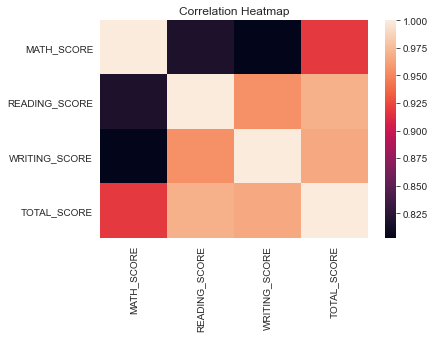

In [18]:
g = sns.heatmap(df.corr())
g.set_title("Correlation Heatmap",y = 1.03)
plt.show()

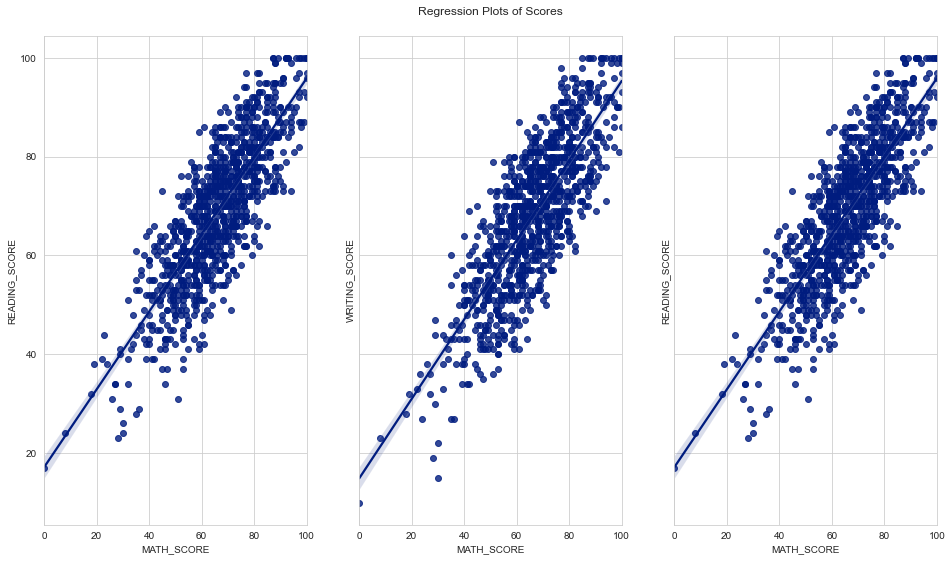

In [19]:
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, sharey = True, figsize = (16, 9))

sns.set_palette("dark")
# MATH_SCORE - READING_SCORE
sns.regplot(x = "MATH_SCORE", y = "READING_SCORE", data = df, ax = ax0)

# MATH_SCORE - WRITING_SCORE
sns.regplot(x = "MATH_SCORE", y = "WRITING_SCORE", data = df, ax = ax1)
ax1.set_title("Regression Plots of Scores",y = 1.03)

# READING_SCORE - WRITING_SCORE
sns.regplot(x = "MATH_SCORE", y = "READING_SCORE", data = df, ax = ax2)
plt.show()

### Scores - Test Preparation Course

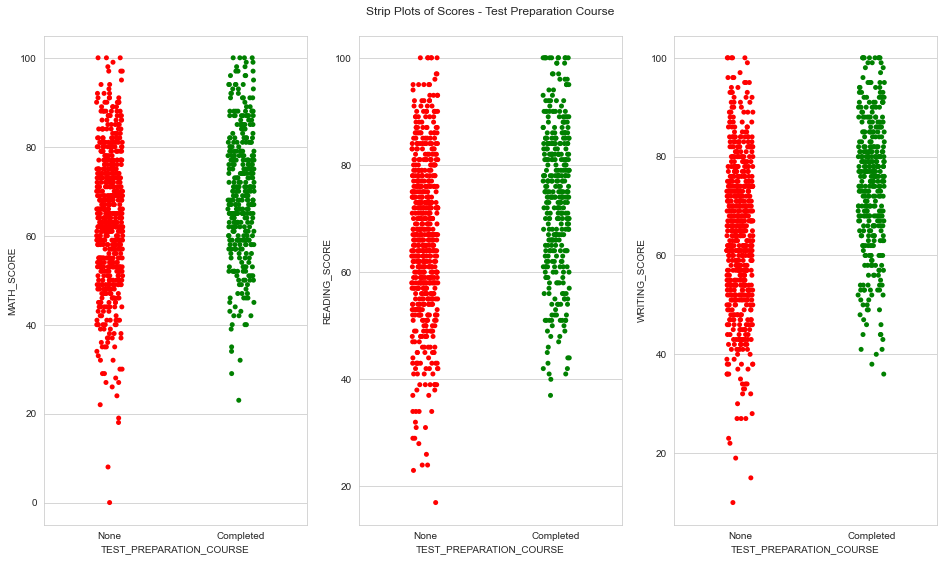

In [20]:
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize = (16, 9))
sns.set_palette(["red", "green"])
sns.stripplot(y = "MATH_SCORE", x = "TEST_PREPARATION_COURSE", data = df, ax = ax0)
ax1.set_title("Strip Plots of Scores - Test Preparation Course",y = 1.03)
sns.stripplot(y = "READING_SCORE", x = "TEST_PREPARATION_COURSE", data = df, ax = ax1)
sns.stripplot(y = "WRITING_SCORE", x = "TEST_PREPARATION_COURSE", data = df, ax = ax2)
plt.show()

## Number of Categories of Variables That May Affect Grades

### Gender

Female    518
Male      482
Name: GENDER, dtype: int64


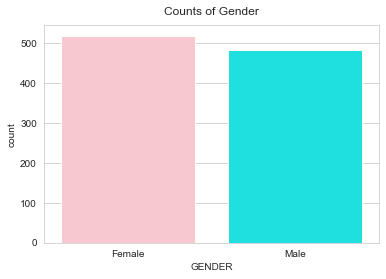

In [21]:
# Counts of GENDER variable
print(df["GENDER"].value_counts())
g = sns.countplot(x = "GENDER", data = df, palette = {"Female":"pink", "Male":"cyan"})
g.set_title("Counts of Gender",y = 1.02)
plt.show()

### Race/Ethnicity

Group C    319
Group D    262
Group B    190
Group E    140
Group A     89
Name: RACE/ETHNICITY, dtype: int64


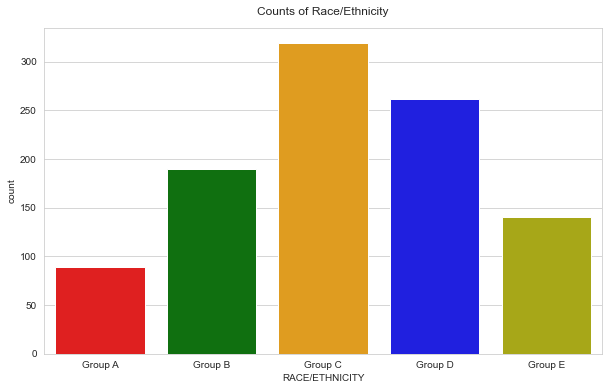

In [22]:
fig, ax = plt.subplots(figsize = (10,6))
custom_palette = ["r", "g", "orange", "b", "y", "c"]
sns.set_palette(custom_palette)
print(df["RACE/ETHNICITY"].value_counts())
g = sns.countplot(x = "RACE/ETHNICITY", data = df.sort_values(by = "RACE/ETHNICITY"))
g.set_title("Counts of Race/Ethnicity",y = 1.02)
plt.show()

### Parental Level of Education

Some College          226
Associate'S Degree    222
High School           196
Some High School      179
Bachelor'S Degree     118
Master'S Degree        59
Name: PARENTAL_LEVEL_OF_EDUCATION, dtype: int64


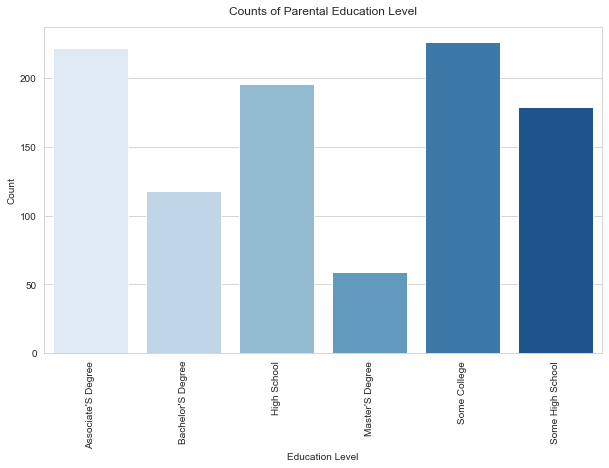

In [23]:
fig, ax = plt.subplots(figsize = (10,6))
sns.set_palette("Blues")
print(df["PARENTAL_LEVEL_OF_EDUCATION"].value_counts())
g = sns.countplot(x = "PARENTAL_LEVEL_OF_EDUCATION", 
              data = df.sort_values(by = "PARENTAL_LEVEL_OF_EDUCATION"))
g.set_title("Counts of Parental Education Level", y = 1.02)
g.set(xlabel = "Education Level", ylabel = "Count")
plt.xticks(rotation = 90)
plt.show()

### Lunch

Standard        645
Free/Reduced    355
Name: LUNCH, dtype: int64


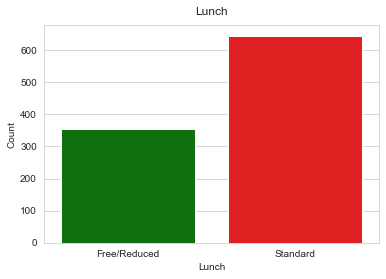

In [24]:
sns.set_palette(["green", "red"])
print(df["LUNCH"].value_counts())
g = sns.countplot(x = "LUNCH", 
              data = df.sort_values(by = "LUNCH"))
g.set_title("Lunch",y = 1.02)
g.set(xlabel = "Lunch", ylabel = "Count")
plt.show()

### Test Preparation Course

None         642
Completed    358
Name: TEST_PREPARATION_COURSE, dtype: int64


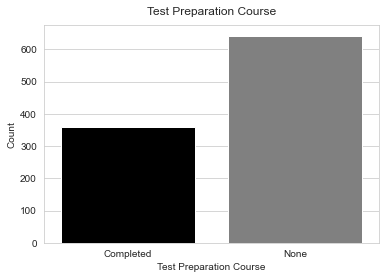

In [25]:
sns.set_palette(["black", "gray"])
print(df["TEST_PREPARATION_COURSE"].value_counts())
g = sns.countplot(x = "TEST_PREPARATION_COURSE", 
              data = df.sort_values(by = "TEST_PREPARATION_COURSE"))
g.set_title("Test Preparation Course", y = 1.02)
g.set(xlabel = "Test Preparation Course", ylabel = "Count")
plt.show()

## Factors That Can Affect Scores

### Parental Level of Education

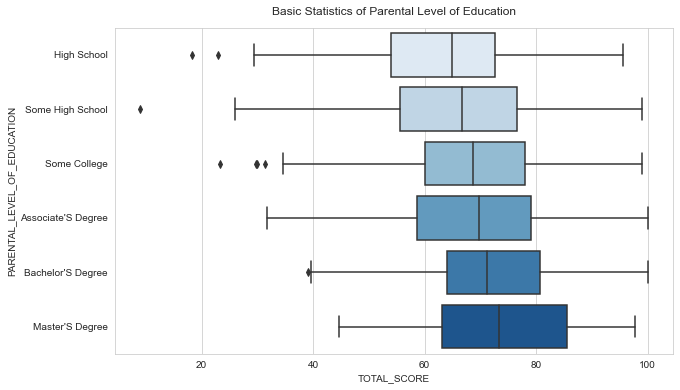

In [26]:
fig, ax = plt.subplots(figsize = (10,6))
sns.set_palette("Blues")
order = ['High School', 'Some High School', "Some College", "Associate'S Degree", "Bachelor'S Degree", "Master'S Degree"]
g = sns.boxplot(x = "TOTAL_SCORE", y = "PARENTAL_LEVEL_OF_EDUCATION", data = df, order = order)
g.set_title("Basic Statistics of Parental Level of Education",y = 1.02)
plt.show()

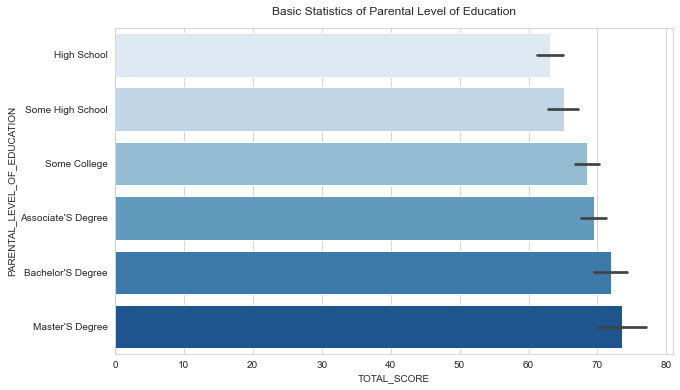

In [27]:
fig, ax = plt.subplots(figsize = (10,6))
sns.set_palette("Blues")
g = sns.barplot(x = "TOTAL_SCORE", y = "PARENTAL_LEVEL_OF_EDUCATION", data = df, order = order)
g.set_title("Basic Statistics of Parental Level of Education",y = 1.02)
plt.show()

### Parental Level of Education - Gender

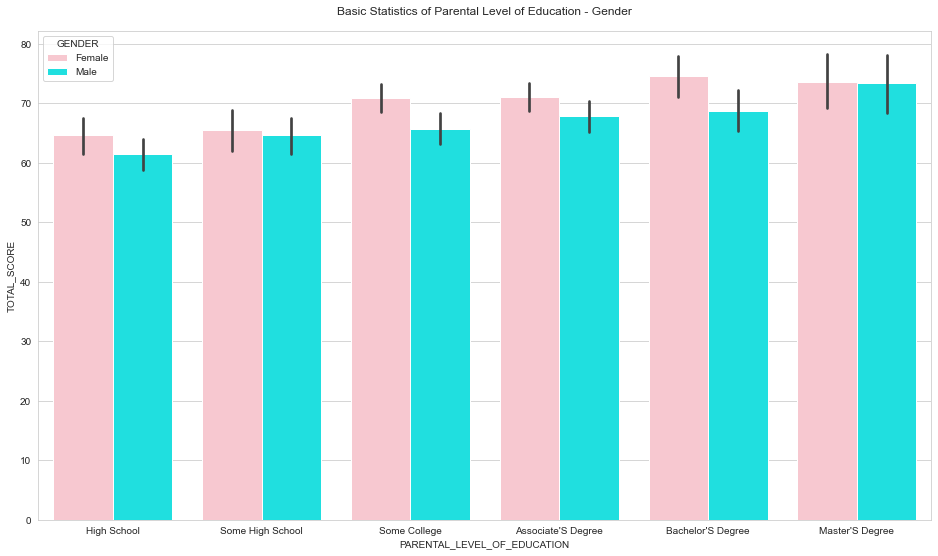

In [28]:
fig,ax = plt.subplots(figsize = (16, 9))
sns.set_palette(["pink","cyan"])
g = sns.barplot(y = "TOTAL_SCORE", 
            x = "PARENTAL_LEVEL_OF_EDUCATION", 
            hue = "GENDER",
            data = df, order = order)
g.set_title("Basic Statistics of Parental Level of Education - Gender",y = 1.02)
plt.show()

### Parentel Level of Education - Test Preparation Course

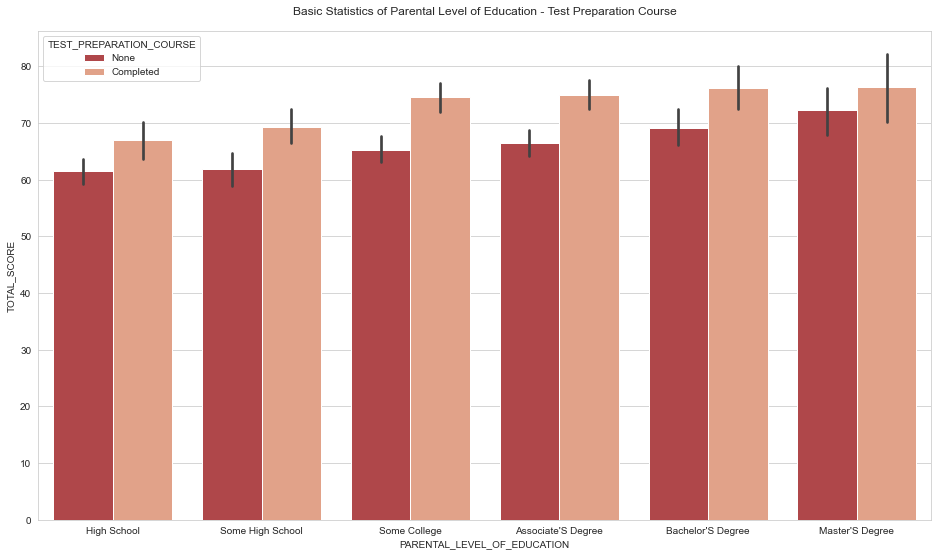

In [29]:
fig,ax = plt.subplots(figsize = (16, 9))
sns.set_palette("RdBu")
g = sns.barplot(y = "TOTAL_SCORE", 
            x = "PARENTAL_LEVEL_OF_EDUCATION", 
            hue = "TEST_PREPARATION_COURSE",
            data = df, order = order)
g.set_title("Basic Statistics of Parental Level of Education - Test Preparation Course",y = 1.02)
plt.show()

### Race/Ethnicity - Gender

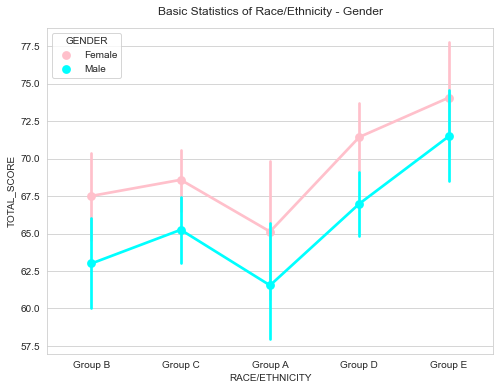

In [30]:
sns.set_style("whitegrid")
fig,ax = plt.subplots(figsize = (8, 6))
sns.set_palette(["pink","cyan"])
g = sns.pointplot(x = "RACE/ETHNICITY", y = "TOTAL_SCORE", data = df, hue = "GENDER")
g.set_title("Basic Statistics of Race/Ethnicity - Gender",y = 1.02)
plt.show()

### Lunch - Race/Ethnicity

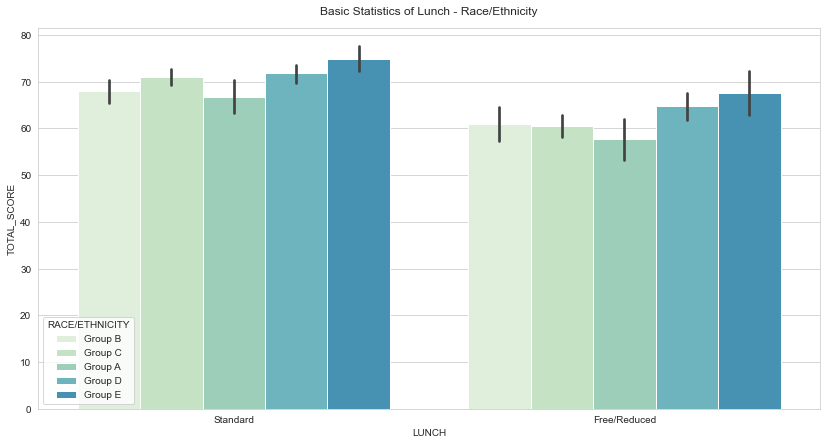

In [31]:
fig,ax = plt.subplots(figsize = (14, 7))
sns.set_palette("GnBu")
g = sns.barplot(y = "TOTAL_SCORE", x = "LUNCH", data = df, hue = "RACE/ETHNICITY")
g.set_title("Basic Statistics of Lunch - Race/Ethnicity",y = 1.02)
plt.show()

### Race/Ethnicity

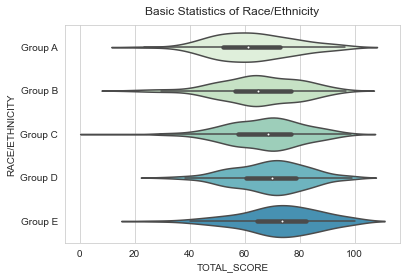

In [32]:
sns.set_palette("GnBu")
order2 = ['Group A', 'Group B', "Group C", "Group D", "Group E"]
g = sns.violinplot(x = "TOTAL_SCORE", y = "RACE/ETHNICITY", data = df, order = order2)
g.set_title("Basic Statistics of Race/Ethnicity",y = 1.02)
plt.show()

### Letter Grade: AA

Female    0.727273
Male      0.272727
Name: GENDER, dtype: float64


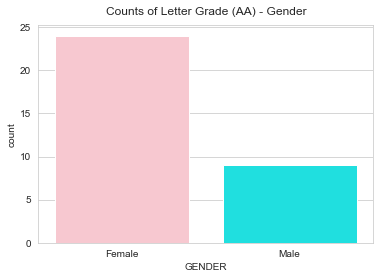

In [33]:
sns.set_palette(["pink", "cyan"])
print(df[df["LETTER_GRADE"] == "AA"]["GENDER"].value_counts(normalize = True))
g = sns.countplot(x = "GENDER", data = df[df["LETTER_GRADE"] == "AA"])
g.set_title("Counts of Letter Grade (AA) - Gender",y = 1.02)
plt.show()

### Letter Grade: FF

Female    26
Male      24
Name: GENDER, dtype: int64


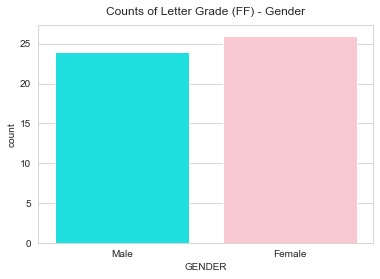

In [34]:
sns.set_palette(["cyan", "pink"])
print(df[df["LETTER_GRADE"] == "FF"]["GENDER"].value_counts())
g = sns.countplot(x = "GENDER", data = df[df["LETTER_GRADE"] == "FF"])
g.set_title("Counts of Letter Grade (FF) - Gender",y = 1.02)
plt.show()

### Scores - Gender / Scatter - KDE

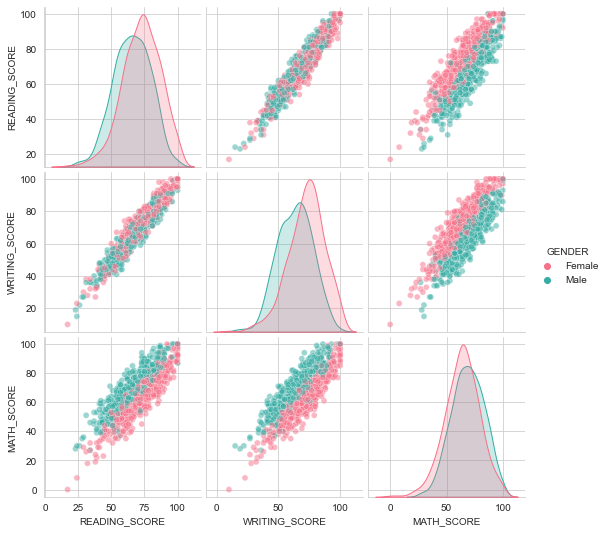

In [35]:
sns.pairplot(df, vars = ["READING_SCORE", "WRITING_SCORE", "MATH_SCORE"], 
             hue = "GENDER",
             palette = "husl",
             plot_kws = {"alpha": 0.5})
plt.show()

# Result
* The successful ranking of the students between the tests with very few differences;  **READING_SCORE** > **WRITING_SCORE** > **MATH_SCORE**
* Students usually do the same in one test as they do in the other. 
* Female are more successful than male; **Female** > **Male**
* There is also a ranking of success among the groups;  **E** > **D** > **C** > **B** > **A**
* Students' notes also vary according to the education level of their parents. The higher the parent's education level, the higher the student's chance of success. 
* Considering the results of the student's financial situation according to the fees paid for lunch;  **Standard** > **Free/Reduced**
* Students who attend the test preparation course are usually one step ahead of other students;  **Completed** > **None**

In [36]:
# En yüksek ortalamaya sahip 20 öğrenci
df.sort_values("TOTAL_SCORE", ascending = False).head(20)

,GENDER,RACE/ETHNICITY,PARENTAL_LEVEL_OF_EDUCATION,LUNCH,TEST_PREPARATION_COURSE,MATH_SCORE,READING_SCORE,WRITING_SCORE,TOTAL_SCORE,LETTER_GRADE
916,Male,Group E,Bachelor'S Degree,Standard,Completed,100,100,100,100.00,AA
458,Female,Group E,Bachelor'S Degree,Standard,None,100,100,100,100.00,AA
962,Female,Group E,Associate'S Degree,Standard,None,100,100,100,100.00,AA
114,Female,Group E,Bachelor'S Degree,Standard,Completed,99,100,100,99.67,AA
179,Female,Group D,Some High School,Standard,Completed,97,100,100,99.00,AA
712,Female,Group D,Some College,Standard,None,98,100,99,99.00,AA
165,Female,Group C,Bachelor'S Degree,Standard,Completed,96,100,100,98.67,AA
625,Male,Group D,Some College,Standard,Completed,100,97,99,98.67,AA
903,Female,Group D,Bachelor'S Degree,Free/Reduced,Completed,93,100,100,97.67,AA
149,Male,Group E,Associate'S Degree,Free/Reduced,Completed,100,100,93,97.67,AA
